In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploring UK Biobank data and relating it to mean activity

In [2]:
from accel.read_data import load_data

In [3]:
# Path to dataset
PATH = '/cdtshared/wearables/students/group5/'

# Features from biobank
raw_data = load_data(PATH+'reduced-cohort.csv')

In [4]:
raw_data.shape

(99413, 70)

There are quite a few features in this data-set(70 = 69 features + 1 reponse)! We have 99413 observations in this data-set, though we still need to check for missingness. The response we are looking at is `acc.overall.avg` which takes the mean of the accelerometer data. The accelerometer data is time series data which measures the acceleration experienced by the device in x, y and z directions relative to the device which is worn on the participant's wrist. 

We preview the first few rows below:

In [6]:
raw_data.head()

,Unnamed: 0,acc.overall.avg,Participant ID,MET minutes per week for vigorous activity | Instance 0,Tea intake | Instance 0,Sex,Type of accommodation lived in | Instance 0,Duration of walks | Instance 0,Frequency of stair climbing in last 4 weeks | Instance 0,Getting up in morning | Instance 0,...,Attendance/disability/mobility allowance | Instance 0,Ethnic background | Instance 0,Crime score,Education score,Employment score,Health score,Housing score,Income score,Index of Multiple Deprivation,Living environment
0,0,24.20244,1000052,960.0,4,Female,A house or bungalow,40,1-5 times a day,Fairly easy,...,None of the above,British,-0.55,23.89,0.12,-0.33,6.90,0.19,18.76,8.70
1,1,31.56829,1000133,320.0,8,Male,A house or bungalow,30,11-15 times a day,Fairly easy,...,None of the above,British,1.46,22.17,0.08,0.43,28.64,0.09,22.82,11.35
2,2,31.81727,1000209,1920.0,2,Male,A house or bungalow,60,16-20 times a day,Fairly easy,...,None of the above,British,-0.70,10.13,0.08,0.16,22.16,0.04,10.10,1.64
3,3,23.68884,1000297,0.0,7,Male,A house or bungalow,30,6-10 times a day,Very easy,...,None of the above,British,0.96,7.07,0.11,0.23,32.34,0.17,27.22,42.53
4,4,18.83354,1000384,3600.0,2,Male,A house or bungalow,20,11-15 times a day,Very easy,...,None of the above,Any other white background,-1.18,1.49,0.06,-0.32,5.69,0.04,4.60,5.79


## Defining features
We define the categorical and numerical features and get rid of columns such as the participant ID and the index. Upon exploring the categorical and numerical features, it appears that it might be worth further defining genres of similar features, and that it might not be a good idea to include all variables without reflecting on their encoding and meaning further. To what extent is our data-set representative and which categories might be under-represented in our data?

In [8]:
set(raw_data.columns)

{'Above moderate/vigorous recommendation | Instance 0',
 'Above moderate/vigorous/walking recommendation | Instance 0',
 'Age at recruitment',
 'Age started wearing glasses or contact lenses | Instance 0',
 'Alcohol drinker status | Instance 0',
 'Alcohol intake frequency. | Instance 0',
 'Attendance/disability/mobility allowance | Instance 0',
 'Average total household income before tax | Instance 0',
 'Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0',
 'Body mass index (BMI) | Instance 0',
 'Breastfed as a baby | Instance 0',
 'Cancer diagnosed by doctor | Instance 0',
 'Chest pain or discomfort | Instance 0',
 'Cooked vegetable intake | Instance 0',
 'Crime score',
 'Diabetes diagnosed by doctor | Instance 0',
 'Duration of walks | Instance 0',
 'Education score',
 'Employment score',
 'Ethnic background | Instance 0',
 'Exposure to tobacco smoke at home | Instance 0',
 'Exposure to tobacco smoke outside home | Instance 0',


In [9]:
features_of_interest = list(set(raw_data.columns) - set(['Unnamed: 0', 'Participant ID', 'acc.overall.avg']))

# identify the categorical features
categorical_features = []
for col in raw_data:
    if raw_data[col].dtype=='object':
        categorical_features.append(col)
        
# indentify the numerical features
numeric_features = list(set(features_of_interest) - set(categorical_features))

In [10]:
set(categorical_features)

{'Above moderate/vigorous recommendation | Instance 0',
 'Above moderate/vigorous/walking recommendation | Instance 0',
 'Age started wearing glasses or contact lenses | Instance 0',
 'Alcohol drinker status | Instance 0',
 'Alcohol intake frequency. | Instance 0',
 'Attendance/disability/mobility allowance | Instance 0',
 'Average total household income before tax | Instance 0',
 'Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0',
 'Breastfed as a baby | Instance 0',
 'Cancer diagnosed by doctor | Instance 0',
 'Chest pain or discomfort | Instance 0',
 'Cooked vegetable intake | Instance 0',
 'Diabetes diagnosed by doctor | Instance 0',
 'Duration of walks | Instance 0',
 'Ethnic background | Instance 0',
 'Exposure to tobacco smoke at home | Instance 0',
 'Exposure to tobacco smoke outside home | Instance 0',
 'Fractured/broken bones in last 5 years | Instance 0',
 'Frequency of stair climbing in last 4 weeks | Instance 0',
 '

In [11]:
set(numeric_features)

{'Age at recruitment',
 'Body mass index (BMI) | Instance 0',
 'Crime score',
 'Education score',
 'Employment score',
 'Health score',
 'Housing score',
 'Income score',
 'Index of Multiple Deprivation',
 'Living environment',
 'MET minutes per week for moderate activity | Instance 0',
 'MET minutes per week for vigorous activity | Instance 0',
 'MET minutes per week for walking | Instance 0',
 'Summed days activity | Instance 0',
 'Townsend deprivation index at recruitment'}

## Thoughts!

It seems that some of the categorical variables, such as `Time spend outdoors in summer`, might be numerical in nature and some of the numerical variables, such as `living environment`, might be categorical in nature. 

There are also some variables whose relevance are note immediately obvious to predicting physical activity such as:
- How are people in household related to participant
- Age started wearing glasses or contact lenses | Instance 0 
- Mouth/teeth dental problems | Instance 0'

It might make sense to manually group variables into categories such as:

Categorical prefeaced with *C*, 
Numerical prefaced with *N* 
(! denotes items which should be looked into further): 

- emotional
    - C Irritability | Instance 0
    - C Miserableness | Instance 0
    - C Mood swings | Instance 0
    - C Sensitivity / hurt feelings | Instance 0
    - C Worrier / anxious feelings | Instance 0
- dietary 
    - C Cooked vegetable intake | Instance 0
    - C Fresh fruit intake | Instance 0
    - C Oily fish intake | Instance 0
    - C Salad / raw vegetable intake | Instance 0
    - C Salt added to food | Instance 0
    - C Tea intake | Instance 0
    - C Water intake | Instance 0
- socio
    - C! Average total household income before tax | Instance 0
    - C Ethnic background | Instance 0
    - C! Number of vehicles in household | Instance 0
    - C Qualifications | Instance 0
    - C Sex
    - C Type of accommodation lived in | Instance 0
    - N Age at recruitment
    - N Crime score
    - N Education score
    - N Employment score
    - N Housing score
    - N Income score
    - N! Index of Multiple Deprivation
    - N Living environment
    - N! Townsend deprivation index at recruitment
- physical
    - C Above moderate/vigorous recommendation | Instance 0
    - C Above moderate/vigorous/walking recommendation | Instance 0
    - C Attendance/disability/mobility allowance | Instance 0
    - C! Duration of walks | Instance 0
    - C! Frequency of stair climbing in last 4 weeks | Instance 0
    - C! Frequency of tiredness / lethargy in last 2 weeks | Instance 0
    - C IPAQ activity group | Instance 0
    - N Body mass index (BMI) | Instance 0
    - N MET minutes per week for moderate activity | Instance 0
    - N MET minutes per week for vigorous activity | Instance 0
    - N MET minutes per week for walking | Instance 0
    - N Summed days activity | Instance 0
- lifestyle
    - C Alcohol drinker status | Instance 0
    - C Alcohol intake frequency. | Instance 0
    - C Exposure to tobacco smoke at home | Instance 0
    - C Exposure to tobacco smoke outside home | Instance 0
    - C Length of mobile phone use | Instance 0
    - C! Sleep duration | Instance 0
    - C Smoking status | Instance 0
    - C! Time spend outdoors in summer | Instance 0
    - C! Time spent outdoors in winter | Instance 0
    - C! Time spent using computer | Instance 0
    - C! Time spent watching television (TV) | Instance 0
    - C Weekly usage of mobile phone in last 3 months | Instance 0
- health
    - C Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0
    - C Cancer diagnosed by doctor | Instance 0
    - C Chest pain or discomfort | Instance 0
    - C Diabetes diagnosed by doctor | Instance 0
    - C Fractured/broken bones in last 5 years | Instance 0
    - C Mouth/teeth dental problems | Instance 0
    - C Other serious medical condition/disability diagnosed by doctor | Instance 0
    - C Overall health rating | Instance 0
    - C Vascular/heart problems diagnosed by doctor | Instance 0
    - N Health score
- other
    - C Age started wearing glasses or contact lenses | Instance 0
    - C Breastfed as a baby | Instance 0
    - C Getting up in morning | Instance 0
    - C How are people in household related to participant | Instance 0
    - C Number in household | Instance 0
    - C Wears glasses or contact lenses | Instance 0

Also, which of these variables were included in the previous study? We should also make it easy to load those variables. I envision having a function which quickly selects variables based on categories.

## Selecting all features

In [12]:
X = raw_data[features_of_interest]
y = raw_data['acc.overall.avg']

## Missingness
There appears to be a large amount of missing data. We want to check how much is missing in each column.

In [13]:
n_missing = X.isna().sum().to_numpy() # get number of missing values per column
print("Number of rows with missing data: ", X.shape[0] - X.dropna().shape[0]) 

Number of rows with missing data:  51522


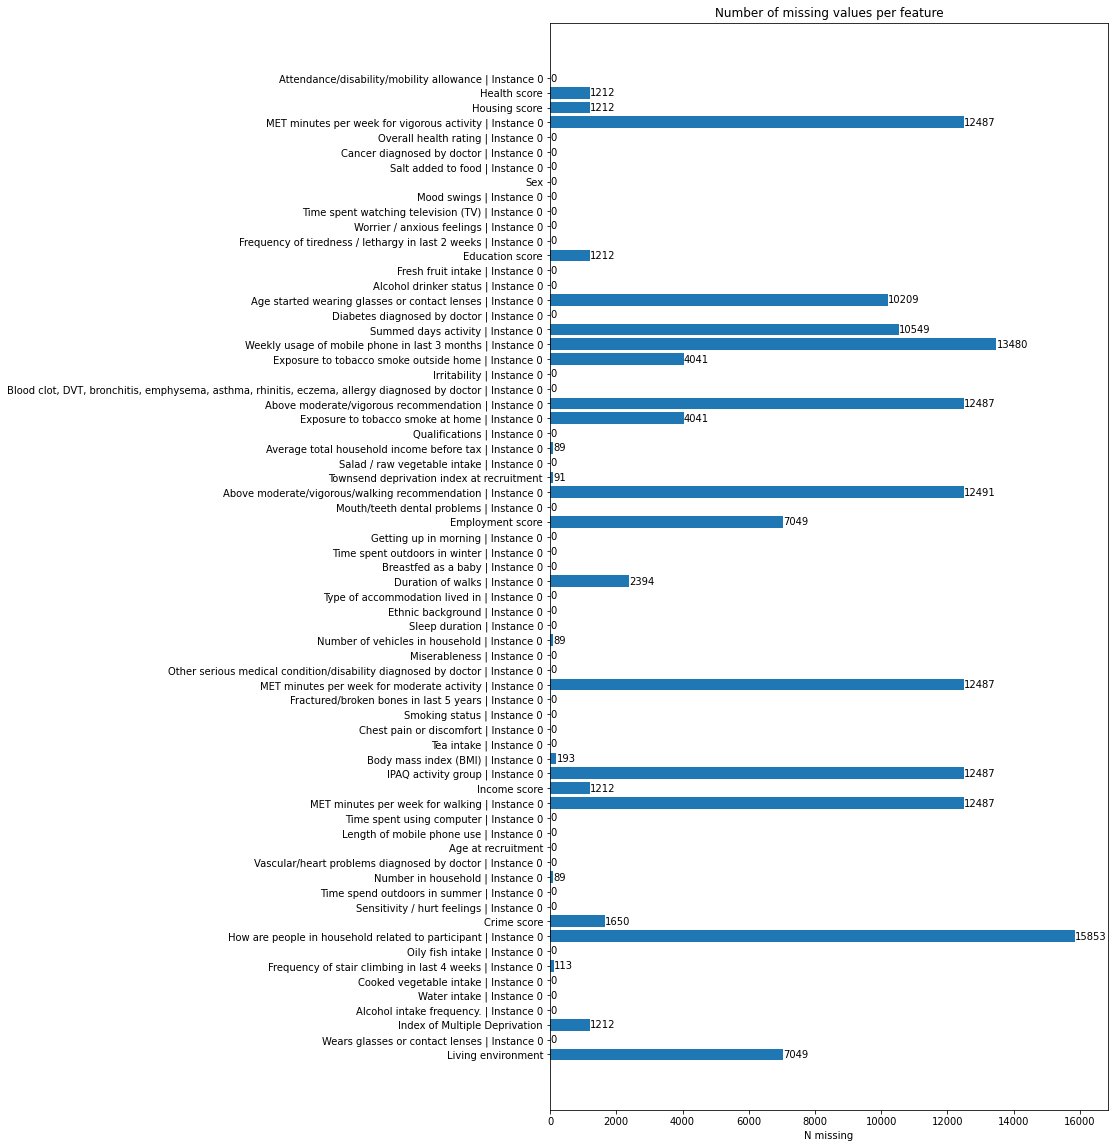

In [88]:
fig, ax = plt.subplots(figsize=(10,20))

col_names = list(X.columns)
y_pos = np.arange(len(col_names))

hbars = ax.barh(y_pos, n_missing, align='center')
ax.set_yticks(y_pos, labels=col_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('N missing')
ax.set_title('Number of missing values per feature')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%d')
ax.set_xlim(right=np.max(n_missing)+1000)  # adjust xlim to fit labels

plt.show()


Next: 
- read and load genres of variales
- define previous paper group
- define proper formats
- PCA transformations + standardisation
- y transformation